# Lesson 5b: Plotting with Matplotlib

[Matplotlib](https://matplotlib.org/3.1.1/index.html) is probably the most widely used data visualization library in Python and is often used in publications. It was originally built to mimic the functionality of plotting with [Matlab](https://en.wikipedia.org/wiki/MATLAB). In fact, with Matplotlib being a ["core" Python visualization library](https://pyviz.org/tools.html#core), many higher-level visualization libraries (i.e. Pandas, seaborn, altair) are built on top of the Matplotlib foundation. 

Consequently, once you have strong fundamental understanding of Matplotlib you can transfer that knowledge to many other visualization libraries. This lesson seeks to provide that fundamental understanding

```{note}
Work through this lesson to create your first Matplotlib plots and gain an overview of how Matplotlib works. Then at the end of this lesson is a longer video tutorial that provides a comprehensive introduction to Matplotlib.

You can also check out this [series of Matplotlib tutorials](https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_) provided by Corey Schafer. They are excellent!
```

## Learning objectives

By the end of this lesson you will be able to:

* Manipulate Matplotlib's Figure and Axes.
* Create a variety of plots such as line, scatter, box plots and more.
* Combine multiple plots into one overall figure.

## Anatomy of a Figure

There is a hierarchy you must understand when plotting with Matplotlib. The highest and outermost part of a plot is the **Figure**. The Figure contains all the other plotting elements. Typically, you do not interact with it much. Inside the Figure is the **Axes**. This is the actual plotting surface that you normally would refer to as a 'plot'. 

A Figure may contain any number of these **Axes**. The **Axes** is a container for all of the other physical pixels that get drawn onto your screen. This includes the x and y axis, lines, text, points, legends, images, etc... 

:::{figure-md} figures-axes
<img src="../images/figax.png" alt="Figures-axes" width="90%">

Anatomy of Matplotlib figures.
:::

```{note}
Within Matplotlib the term **Axes** is not actually plural and does not mean more than one axis. It literally stands for a single 'plot'. It's unfortunate that this fundamental element has a name that is so confusing.
```


## Importing the pyplot module

Importing matplotlib into your workspace is done a little differently than NumPy or Pandas. You rarely will import matplotlib itself directly like this:

```python
import matplotlib
```

The above is perfectly valid code, but the matplotlib developers decided not to put all the main functionality in the top level module. 

When you `import pandas as pd`, you get access to nearly all of the available functions and classes of the Pandas library. This isn't true with Matplotlib. Instead, much of the functionality for quickly plotting is found in the pyplot module. If you navigate to the matplotlib source directory, found in your site-packages directory, you will see a `pyplot.py` file. This is the module that you are importing into your workspace.

:::{figure-md} pyplot-dir
<img src="../images/pyplot_dir.png" alt="pyplot submodule" width="70%">

pyplot submodule within matplotlib library.
:::

```{note}
There is some functionality in other matplotlib submodules; however, vast majority of what you will use starting out is isolated to the pyplot submodule.
```

Let's import the pyplot module now and alias it as `plt`, which is done by convention:

In [1]:
import matplotlib.pyplot as plt

## Figures and axes

pyplot does provide lots of useful functions, one of which creates a **Figure** and any number of **Axes** that you desire. You can do this without pyplot, but it involves more syntax. It's also quite standard to begin the object-oriented approach by laying out your Figure and Axes first with pyplot and then proceed by calling methods from these objects.

The pyplot **`subplots()`** function creates a single Figure and any number of Axes. If you call it with the default parameters it will create a single Axes within a Figure. 

```{note}
The `subplots` function returns a two-item tuple containing the Figure and the Axes. Recall from our earlier lesson where we learned about tuples that we can unpack each of these objects as their own variable.
```

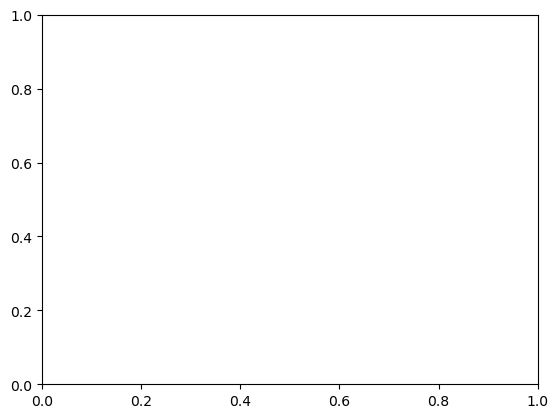

In [2]:
fig, ax = plt.subplots()

Let's verify that we indeed have a Figure and Axes.

In [3]:
type(fig)

matplotlib.figure.Figure

In [4]:
type(ax)

matplotlib.axes._axes.Axes

### Distinguishing the Figure from the Axes

It's not obvious, from looking at the plot which part is the Figure and which is the Axes. We will call our first method, **`set_facecolor`** in an object-oriented fashion from both the Figure and Axes objects. We pass it a name of a color (more on colors later). 

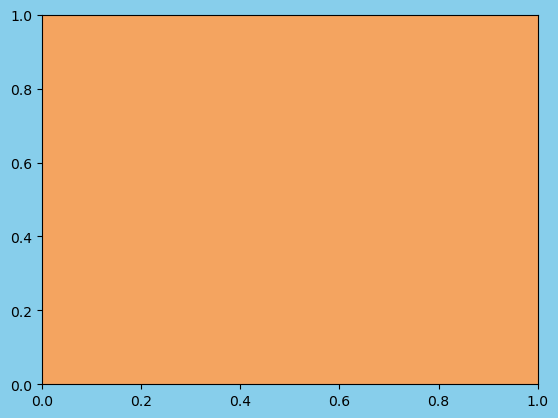

In [5]:
# set figure and axes colors
fig.set_facecolor('skyblue')
ax.set_facecolor('sandybrown')

# show result
fig

```{note}
Notice, that the two calls above to the `set_facecolor` method were made without an assignment statement. Both of these operations happened **in-place**. The calling Figure and Axes objects were updated without a new one getting created.
```

### Setting the size of the Figure upon creation

The default Figure is fairly small. We can change this when creating it with the `figsize` parameter. Pass a two-item tuple to configure the height and width of the figure as we did in the previous lesson with Pandas plotting. By default, these dimensions are 6 by 4. They represent **inches** and are literally the inches that your figure would be if you printed out on paper.

Below, we create a new Figure that is 8 inches in width by 4 inches in height. We also color the faces of the both the Figure and Axes again.

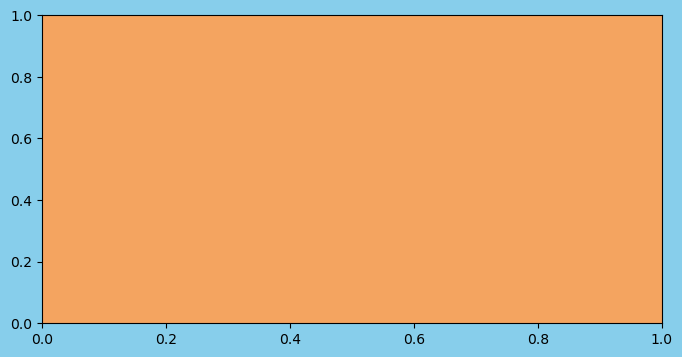

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
fig.set_facecolor('skyblue')
ax.set_facecolor('sandybrown')

Everything on our plot is a separate object. Each of these objects may be explicitly referenced by a variable. Once we have a reference to a particular object, we can then modify it by calling methods on it.

Thus far we have two references, `fig` and `ax`. There are many other objects on our Axes that we can reference such as the x and y axis, tick marks, tick labels, and others. We do not yet have references to these objects.

### Calling Axes methods - `get_` and `set_` methods

Before we start referencing these other objects, let's change some of the properties of our Axes by calling some methods on it. Many methods begin with either `get_` or `set_` followed by the part of the Axes that will get retrieved or modified. The following list shows several of the most common properties that can be set on our Axes. We will see examples of each one below.

* title
* xlabel/ylabel
* xlim/ylim
* xticks/yticks
* xticklabels/yticklabels

#### Getting and setting the title of the Axes

The `get_title` method will return the title of the Axes as a string. There is no title at this moment so it returns an empty string. 

In [7]:
ax.get_title()

''

The `set_title` method will place a centered title on our Axes when passing it a string. Notice that a matplotlib Text object has been returned. More on this later.

In [8]:
ax.set_title('My First Matplotlib Graph')

Text(0.5, 1.0, 'My First Matplotlib Graph')

Again, we must place our Figure variable name as the last line in our cell to show it in our notebook.

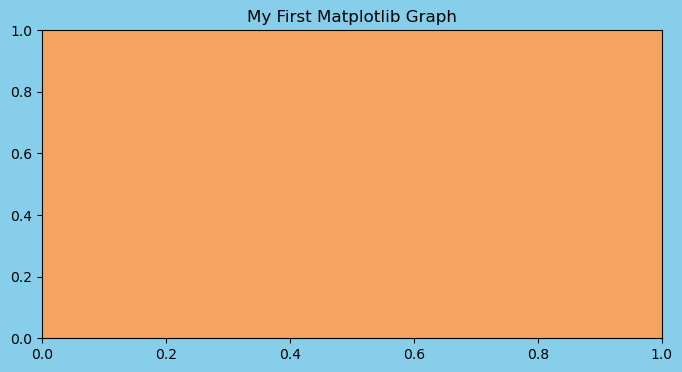

In [9]:
fig

Now, if we run the `get_title` method again, we will get the string that was used as the title.

In [10]:
ax.get_title()

'My First Matplotlib Graph'

#### Getting and setting the x and y limits

By default, the limits of both the x and y axis are 0 to 1. We can change this with the `set_xlim` and `set_ylim` methods. Pass these methods a new left and right boundary to change the limits. These methods actually return a tuple of the limits.

In [11]:
ax.get_xlim()

(np.float64(0.0), np.float64(1.0))

In [12]:
ax.get_ylim()

(np.float64(0.0), np.float64(1.0))

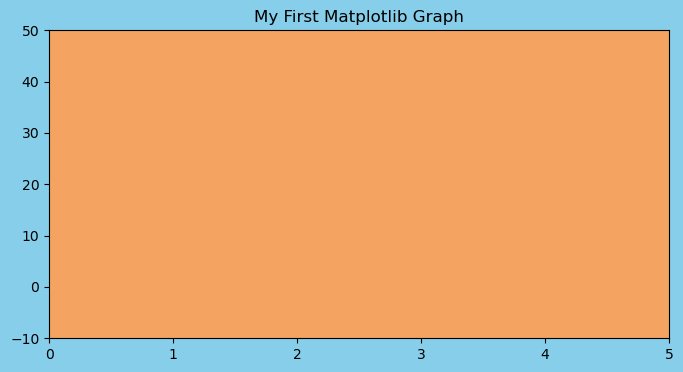

In [13]:
ax.set_xlim(0, 5)
ax.set_ylim(-10, 50)
fig

```{note}
Notice, that the size of the figure remains the same. Only the limits of the x and y axis have changed.
```

#### Getting and setting the location of the x and y ticks

In the graph above, it has chosen to place ticks every 1 unit for the x and every 10 units for the y. Matplotlib chooses reasonable default values. Let's see the location of these ticks with the `get_xticks` and `get_yticks` methods.

In [14]:
ax.get_xticks()

array([0., 1., 2., 3., 4., 5.])

In [15]:
ax.get_yticks()

array([-10.,   0.,  10.,  20.,  30.,  40.,  50.])

We can specify the exact location of the x and y ticks with the `set_xticks` and `set_ticks` methods. We pass them a list of numbers indicating where we want the ticks.

```{note}
If we set the ticks outside of the current bounds of the axis, this forces matplotlib to change the limits. For example, below we set the lower bound ytick (-99) beyond the lower bound of the y-axis limit (-10).
```

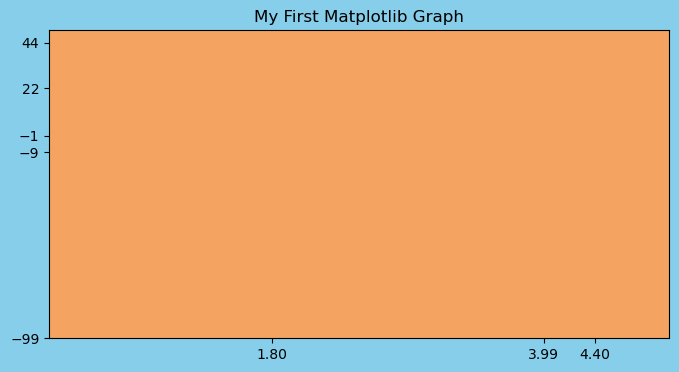

In [16]:
ax.set_xticks([1.8, 3.99, 4.4])
ax.set_yticks([-99, -9, -1, 22, 44])
fig

#### Getting and setting the x and y tick labels

The current tick labels for the x-axis and y-axis are the same as the tick locations. Let's first view the current tick labels. The output displays a list of `Text` objects that contain `Text(xaxis_location, yaxis_location, tick_label)`.

In [17]:
ax.get_xticklabels()

[Text(1.8, 0, '1.80'), Text(3.99, 0, '3.99'), Text(4.4, 0, '4.40')]

We can pass the `set_xticklabels` and `set_yticklabels` methods a list of strings to use as the new labels.

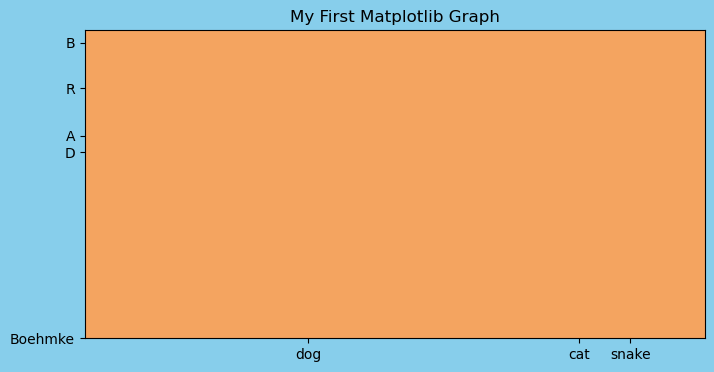

In [18]:
ax.set_xticklabels(['dog', 'cat', 'snake'])
ax.set_yticklabels(['Boehmke', 'D', 'A', 'R', 'B'])
fig

```{tip}
The tick locations are a completely separate concept than the tick labels. The tick locations are always numeric and determine where on the plot the tick mark will appear. The tick labels on the other hand are the strings that are used on the graph.

The tick labels are defaulted to be a string of the tick location, but you can set them to be any string you want, as we did above. But use this wisely otherwise you may lead viewers of your plots astray!
```

### Setting text styles

All the text we placed on our plot was plain. We can add styling to it by changing the text properties. See the documentation for a list of all the [text properties](https://matplotlib.org/tutorials/text/text_props.html). 

Common text properties:

* `size` - Number in "points" where 1 point is defaulted to 1/72nd of an inch
* `color` - One of the [named colors](https://matplotlib.org/gallery/color/named_colors.html). See the [colors API](https://matplotlib.org/tutorials/colors/colors.html) for more.
* `backgroundcolor` - Same as above
* `fontname` - Name of font as a string
* `rotation` - Degree of rotation

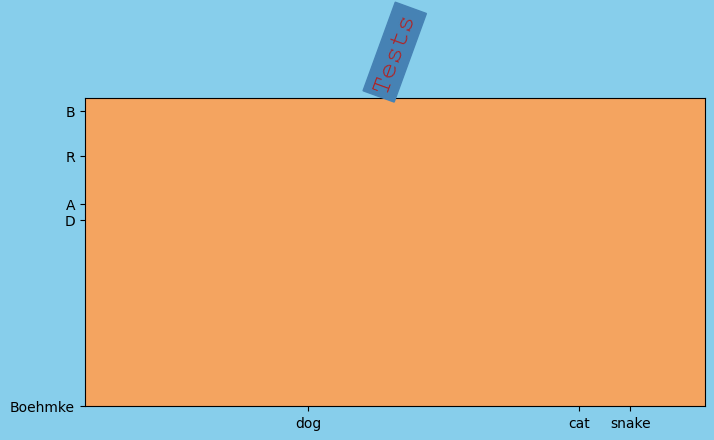

In [19]:
ax.set_title(
    'Tests',
    size=20, 
    color='firebrick',
    backgroundcolor='steelblue',
    fontname='Courier New',
    rotation=70
    )
fig

Any other text may be stylized with those same parameters. Below we do so with the x labels.

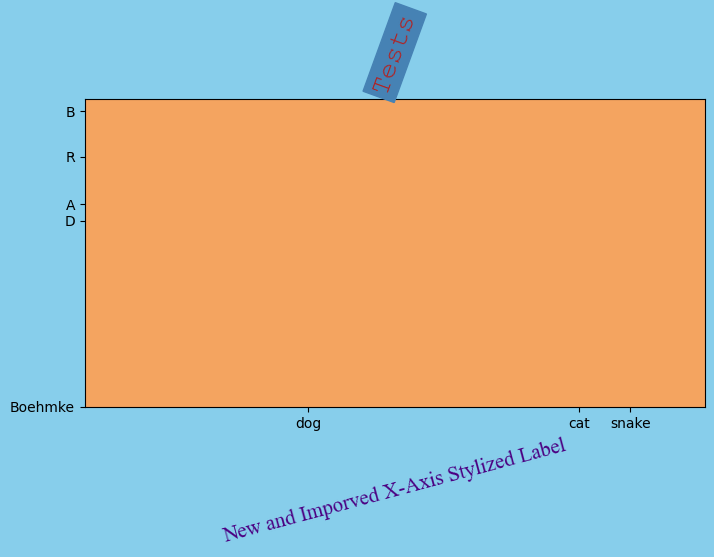

In [20]:
ax.set_xlabel(
    'New and Imporved X-Axis Stylized Label',
    size=15,
    color='indigo', 
    fontname='Times New Roman', 
    rotation=15
    )
fig

### Knowledge check

```{admonition} Exercises:
Create a Figure with a single Axes. Modify the Axes by using all of the methods in this notebook.

* `title`: set as your name and change the font size, color, and name.
* `xlabel/ylabel`: set as your two favorite colors.
* `xlim/ylim`: set x-axis to be 10-100 and y-axis to be -25-25
* `xticks/yticks`: set the xticks to be in increments of 10 and yticks to be in increments of 5.
```

## Plotting Data

In previous section, we created Figure and Axes objects, and proceeded to change their properties without plotting any actual data. In this section, we will learn how to create some of the same plots that we created in the Plotting with Pandas lesson.

The [matplotlib documentation][1] has a nice layout of the Axes API. There are around 300 different calls you make with an Axes object. The API page categorizes and groups each method by its functionality. The first third (approximately) of the categories in the API are used to create plots.

The simplest and most common plots are found in the Basics category and include `plot`, `scatter`, `bar`, `pie`, and others.

[1]: https://matplotlib.org/api/axes_api.html

Let's go ahead and import Pandas along with our Complete Journey data:

In [21]:
import pandas as pd
from completejourney_py import get_data

cj_data = get_data()
df = (
    cj_data['transactions']
    .merge(cj_data['products'], how='inner', on='product_id')
    .merge(cj_data['demographics'], how='inner', on='household_id')
)

df.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,product_category,product_type,package_size,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
1,900,330,31198570047,9878513,1,0.99,0.10,0.0,0.0,1,...,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,85 CT,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
2,1228,406,31198655051,1041453,1,1.43,0.15,0.0,0.0,1,...,BAG SNACKS,POTATO CHIPS,11.5 OZ,45-54,100-124K,None,Unmarried,1,1 Adult No Kids,0
3,906,319,31198705046,1020156,1,1.50,0.29,0.0,0.0,1,...,REFRGRATD DOUGH PRODUCTS,REFRIGERATED BAGELS,17.1 OZ,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1
4,906,319,31198705046,1053875,2,2.78,0.80,0.0,0.0,1,...,SEAFOOD - SHELF STABLE,TUNA,5.0 OZ,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1


### Line `plot`s

The `plot` method's primary purpose is to create line plots. It does have the ability to create scatter plots as well, but that task is best reserved for `scatter`. The `plot` method is very flexible and can take a variety of different inputs (i.e. lists, numpy arrays, Pandas Series) but our examples will focus on using Matplotlib with a DataFrame.

Let's compute the total daily sales and create a line plot:

In [22]:
daily_sales = (
    df
    .set_index('transaction_timestamp')['sales_value']
    .resample('D')
    .sum()
    .to_frame()
    .reset_index()
)
daily_sales.head()

,transaction_timestamp,sales_value
0,2017-01-01,4604.39
1,2017-01-02,6488.94
2,2017-01-03,6856.84
3,2017-01-04,7087.92
4,2017-01-05,6894.67


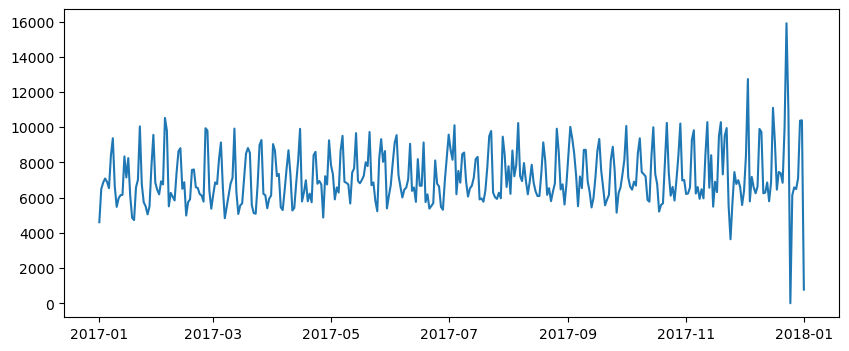

In [23]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot('transaction_timestamp', 'sales_value', data=daily_sales);

We can change several properties of this plot. For example, we can change the line style and color of our line directly in the `ax.plot` call along with adding plot a

```{tip}
You can find all possible parameters to modify the line plot [here](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D). You can also find all the different color options and ways to specify them [here](https://matplotlib.org/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py).
```

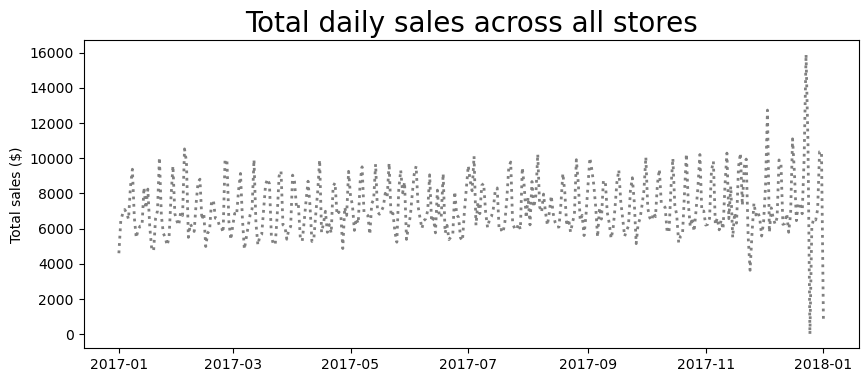

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))

# create/modify line plot
ax.plot(
    'transaction_timestamp', 
    'sales_value', 
    data=daily_sales, 
    linestyle=':', 
    color='gray',
    linewidth=2
    )

# add additional context
ax.set_title('Total daily sales across all stores', size=20)
ax.set_ylabel('Total sales ($)');

We can even add additional features such as gridlines and text/arrows to call out certain parts of the plot.

```{note}
Since our x-axis is a date object we need to specify a date location within `ax.annotate`. The **datetime** module comes as part of the Standard Library and is the defacto approach to creating and manipulating dates and times outside of Pandas.
```

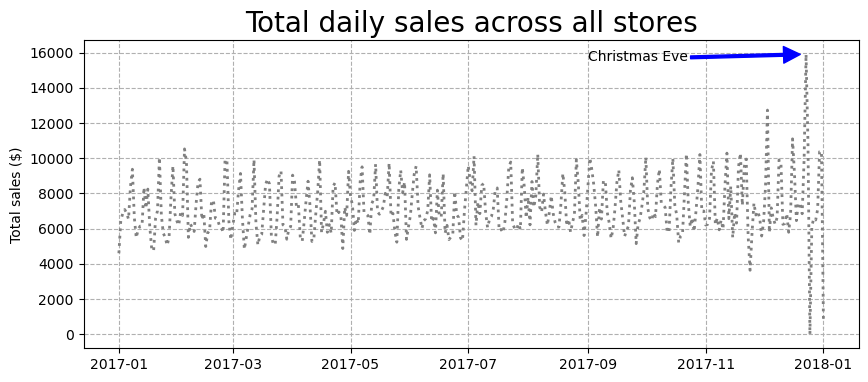

In [25]:
from datetime import date as dt

fig, ax = plt.subplots(figsize=(10, 4))

# create/modify line plot
ax.plot(
    'transaction_timestamp', 
    'sales_value', 
    data=daily_sales, 
    linestyle=':', 
    color='gray',
    linewidth=2
    )

# add additional context
ax.set_title('Total daily sales across all stores', size=20)
ax.set_ylabel('Total sales ($)');

# add gridlines, arrow, and text
ax.grid(linestyle='dashed')
ax.annotate(
    'Christmas Eve', 
    xy=([dt(2017, 12, 20), 15900]), 
    xytext=([dt(2017, 9, 1), 15500]), 
    arrowprops={'color':'blue', 'width':2},
    size=10
    );

### Other plots

We can create many of the other forms of plots that we saw in the previous lesson. The following are just a few examples that recreate the histogram, boxplot, and scatter plots that we made in the Plotting with Pandas lesson.

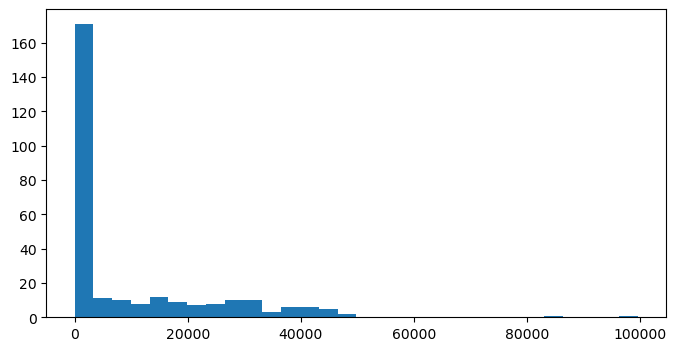

In [26]:
totals_by_store = df.groupby('store_id').agg({'sales_value': 'sum', 'quantity': 'sum'})

# histogram
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist('sales_value', data=totals_by_store, bins=30);

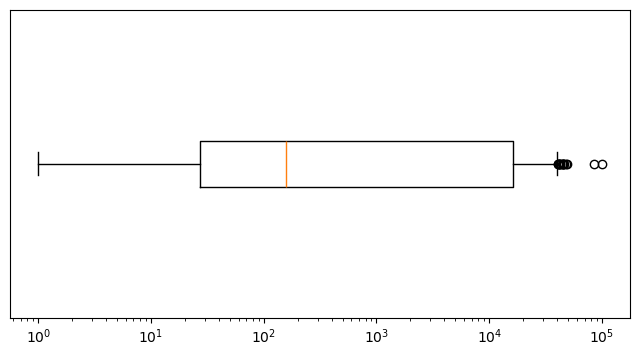

In [27]:
# boxplot
fig, ax = plt.subplots(figsize=(8, 4))
ax.boxplot('sales_value', data=totals_by_store, vert=False)

# adjust axes
ax.set_xscale('log')
ax.set_yticklabels('')
ax.set_yticks([]);

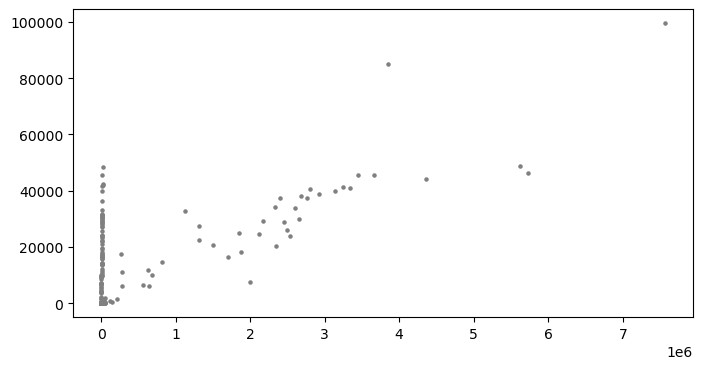

In [28]:
# scatter plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter('quantity', 'sales_value', data=totals_by_store, c='gray', s=5);

### Adding more dimensions

In some cases we can even add additional dimensions to our data. For example, say we have the following data set that has total quantity and sales_value plus a third variable that indicates the number of transactions for each store.

In [29]:
store_count = (
    df
    .groupby('store_id', as_index=False)
    .size()
    .rename(columns={'size': 'n'})
)

totals_by_store = (
    df
    .groupby('store_id', as_index=False)
    .agg({'sales_value': 'sum', 'quantity': 'sum'})
    .merge(store_count)
)

totals_by_store.head()

,store_id,sales_value,quantity,n
0,2,13.99,1,1
1,27,443.97,186,150
2,37,7.27,3,3
3,42,22.78,7,7
4,45,13.01,9,8


We can actually have the color (`c`) and size (`s`) of our points based on data. For example, here we create a Series that is based on the number of store observations and another Series to indicate if the store count was greater than the 95 percentile.

```{note}
We could literally use `s='n'` to reference our count column within the DataFrame; however, since there is such a wide dispersion of count values the size of the points explode. Here, we adjust the dispersion to be smaller with a fractional exponentiation.
```

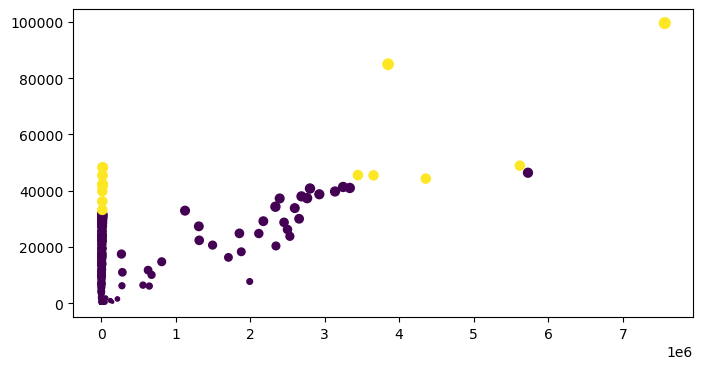

In [30]:
size_adj = totals_by_store['n']**0.4
n_outliers = totals_by_store['n'] > totals_by_store['n'].quantile(0.95)

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter('quantity', 'sales_value', data=totals_by_store, c=n_outliers, s=size_adj);

### Multiple plots

We can create multiple plots ("Axes") within our figure. For example, the following will create 4 plots (2 rows x 2 colums).

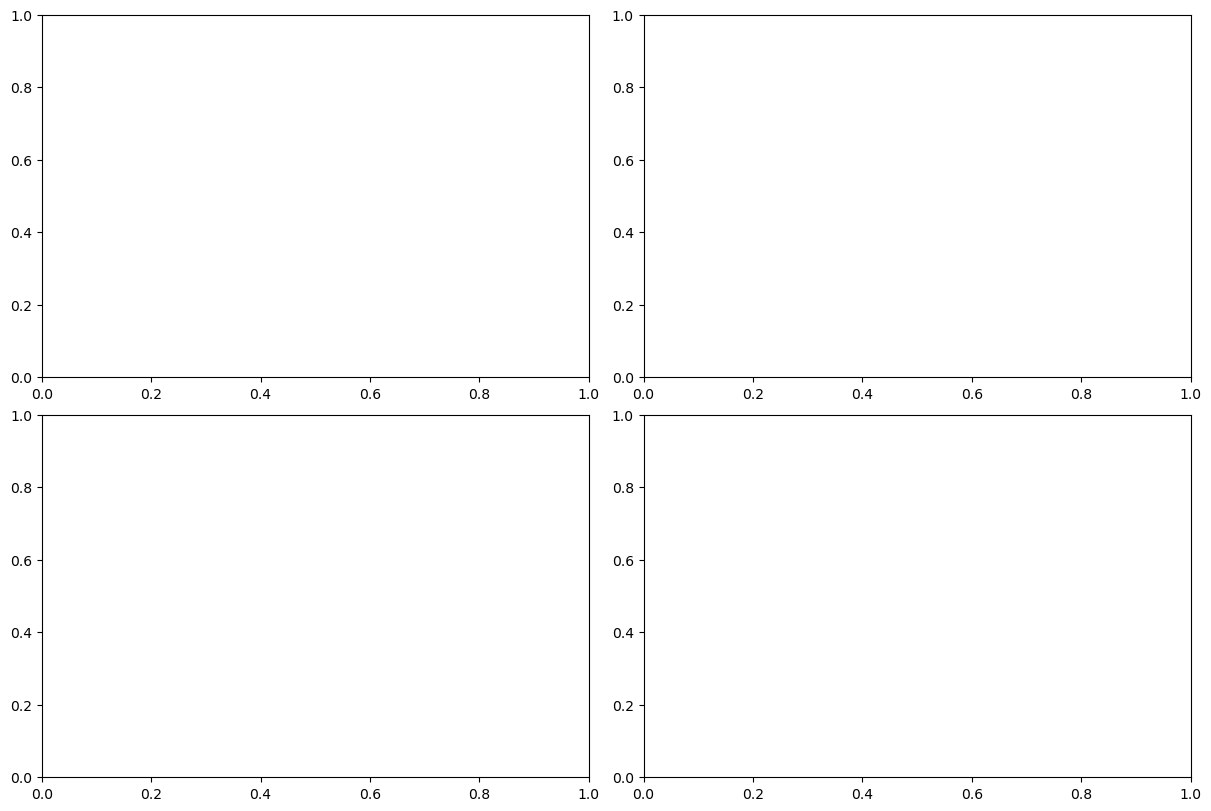

In [31]:
fig, ax_array = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

Whenever you create multiple Axes on a figure with **`subplots`**, you will be returned a NumPy array of Axes objects. Let's verify that the type and shape of this array.

In [32]:
type(ax_array)

numpy.ndarray

In [33]:
ax_array.shape

(2, 2)

If we simply output the array, we will see 4 different Axes objects. Let's extract each of these Axes into their own variable. We need to index for both the row and column to get the respective plot (remember that we need to use zero-based indexing!)

In [34]:
ax_array

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [35]:
ax1 = ax_array[0, 0]  # row 0, col 0
ax2 = ax_array[0, 1]  # row 0, col 1
ax3 = ax_array[1, 0]  # row 1, col 0
ax4 = ax_array[1, 1]  # row 1, col 1

We can now customize our individual plots:

In [36]:
# plot 1
ax1.plot(
    'transaction_timestamp', 
    'sales_value', 
    data=daily_sales, 
    linestyle=':', 
    color='gray',
    linewidth=2
    )

# add additional context
ax1.set_title('Total daily sales across all stores', size=12)
ax1.set_ylabel('Total sales ($)');

# add gridlines, arrow, and text
ax1.grid(linestyle='dashed')
ax1.annotate(
    'Christmas Eve', 
    xy=([dt(2017, 12, 20), 15900]), 
    xytext=([dt(2017, 7, 1), 15500]), 
    arrowprops={'color':'blue', 'width':1},
    size=10
    );

In [37]:
# plot 2
ax2.scatter('quantity', 'sales_value', data=totals_by_store, c=n_outliers, s=size_adj)
ax2.set_title('Total store-level sales vs quantity.', size=12)

# plot 3
ax3.hist('sales_value', data=totals_by_store, bins=30)
ax3.set_title('Histogram of total store-level sales.', size=12)

# plot 4
ax4.boxplot('quantity', data=totals_by_store, vert=False)
ax4.set_xscale('log')
ax4.set_yticklabels('')
ax4.set_yticks([])
ax4.set_title('Histogram of total store-level quantity.', size=12);

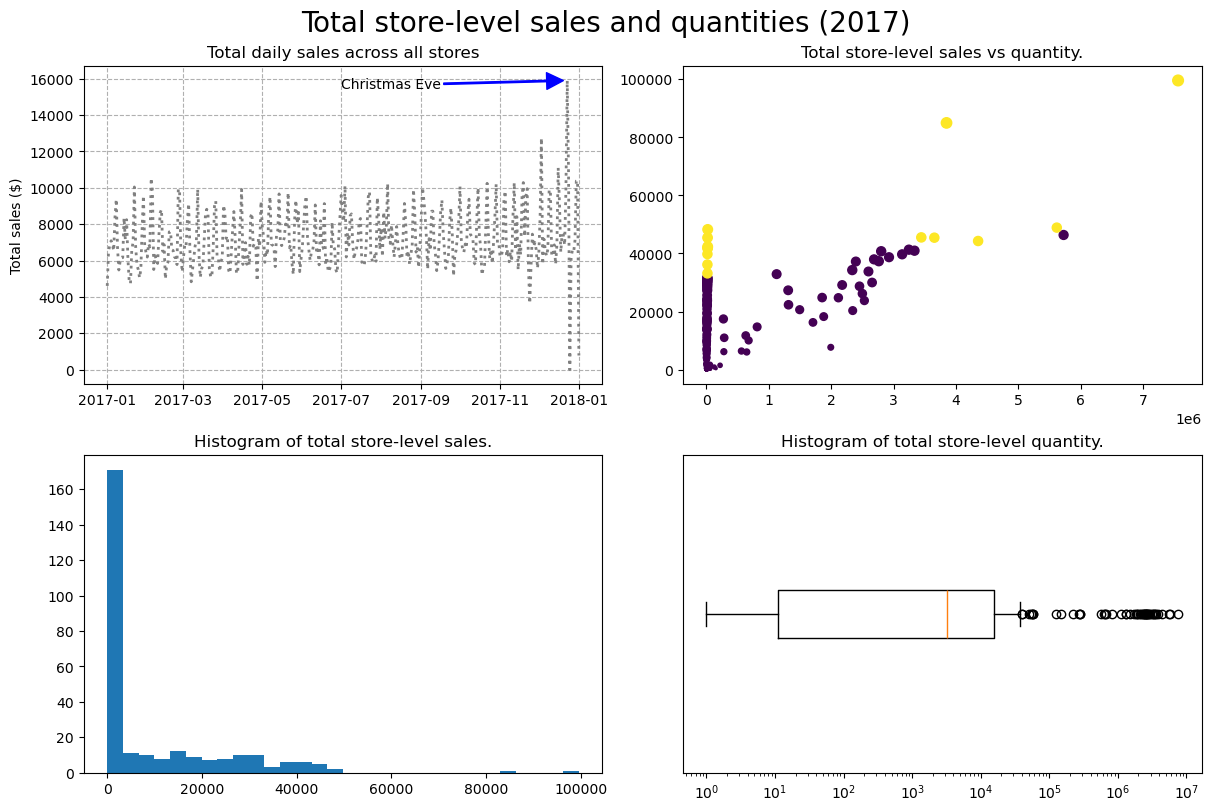

In [38]:
fig.suptitle('Total store-level sales and quantities (2017)', fontsize=20)
fig

## Video Tutorial

```{admonition} Video 🎥:
The following video is from the SciPy 2018 conference. It is an extended (3 hours) introduction to Matplotlib and has been a very popular training offered at [SciPy conferences](https://conference.scipy.org/) over the years.

<iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/1492301/sp/149230100/embedIframeJs/uiconf_id/49148882/partner_id/1492301?iframeembed=true&playerId=kaltura_player&entry_id=1_fw1yn11m&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en_US&amp;flashvars[forceMobileHTML5]=true&amp;flashvars[scrubber.sliderPreview]=false&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=1_rsi40826" width="640" height="610" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-downloads allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" frameborder="0" title="BANA 6043 | Anatomy of Matplotlib (Beginner Level) | SciPy 2018 Tutorial | Benjamin Root &amp; Hannah Aizenman"></iframe>
```

## Exercises

```{admonition} Questions:
:class: attention
1. Identify all different products that contain “pizza” in their `product_type` description.
2. Using Matplotlib:
   - Use a bar plot to assess whether married versus unmarried customers purchase more pizza products. Add proper titles (overall title and axis titles) to your plot.
   - Create a scatter plot to assess the `quantity` versus `sales_value` of pizza products sold. Adjust the axis tick marks and labels and add proper titles to your plot.
   - Use `.resample` to compute the total `quantity` of pizza `product_type`s for each day of the year. Plot the results to assess if there is a pattern.
   - Create a 4th matplotlib plot of your choice.
   - Now create a single figure with 4 Axes (sub-plots) and combine each of the four plots you created above into this one figure. Make sure the sub-plots have proper titles and give the figure an overall title.
```

## Computing environment

In [39]:
%load_ext watermark
%watermark -v -p jupyterlab,pandas,completejourney_py,matplotlib

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

jupyterlab        : 4.2.3
pandas            : 2.2.2
completejourney_py: 0.0.3
matplotlib        : 3.8.4

